In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

data= pd.read_excel("swiggy.xlsx")
print(data)


          ID                    Area       City                Restaurant  \
0        211             Koramangala  Bangalore               Tandoor Hut   
1        221             Koramangala  Bangalore             Tunday Kababi   
2        246               Jogupalya  Bangalore                   Kim Lee   
3        248             Indiranagar  Bangalore         New Punjabi Hotel   
4        249             Indiranagar  Bangalore                       Nh8   
...      ...                     ...        ...                       ...   
8675  464626  Panjarapole Cross Road  Ahmedabad                Malt Pizza   
8676  465835                  Rohini      Delhi  Jay Mata Ji Home Kitchen   
8677  465872                  Rohini      Delhi      Chinese Kitchen King   
8678  465990                  Rohini      Delhi    Shree Ram Paratha Wala   
8679  466488             Navrangpura  Ahmedabad              Sassy Street   

      Price  Avg ratings  Total ratings  \
0       300          4.4        

In [9]:
data.shape

(8680, 10)

In [10]:
data.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [3]:
data.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [4]:
data.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   int64  
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 678.2+ KB


In [6]:
print(data.isnull().sum())

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64


In [11]:
data.duplicated().sum()

0

In [13]:
#group by 
city_group = data.groupby('City').agg({
    'Price': 'mean',
    'Avg ratings': 'mean',
    'Delivery time': 'mean',
    'Total ratings': 'sum'
}).reset_index()

print(city_group)

        City       Price  Avg ratings  Delivery time  Total ratings
0  Ahmedabad  318.128312     3.596513      44.709902          74470
1  Bangalore  382.524313     3.762896      50.529598         140500
2    Chennai  356.247740     3.776311      58.968354         178860
3      Delhi  333.301146     3.526350      50.734861          81420
4  Hyderabad  299.926512     3.701395      49.933023         330270
5    Kolkata  362.294205     3.698811      67.809807         219800
6     Mumbai  393.794832     3.599374      48.318716         150960
7       Pune  353.763303     3.550183      55.854128         122990
8      Surat  270.171875     3.580078      48.484375          60320


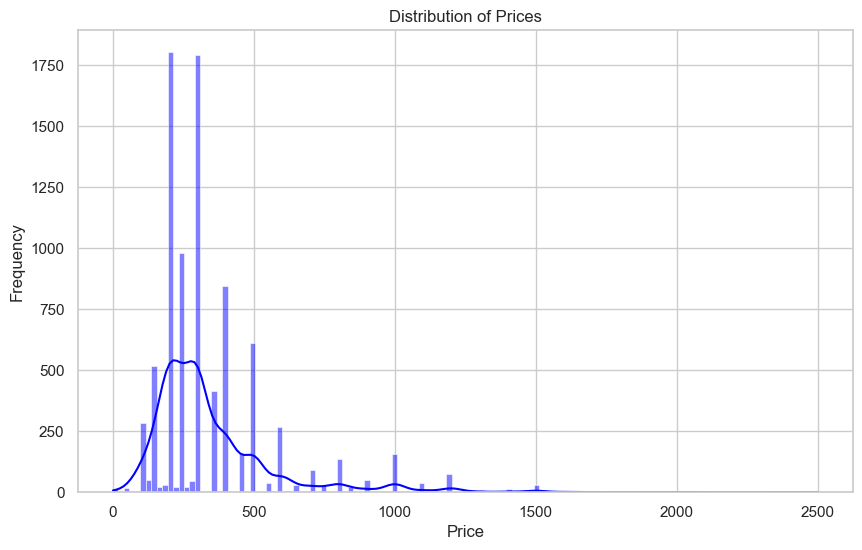

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# theme 
sns.set_theme(style="whitegrid")

# Price distribution
# hist plot
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


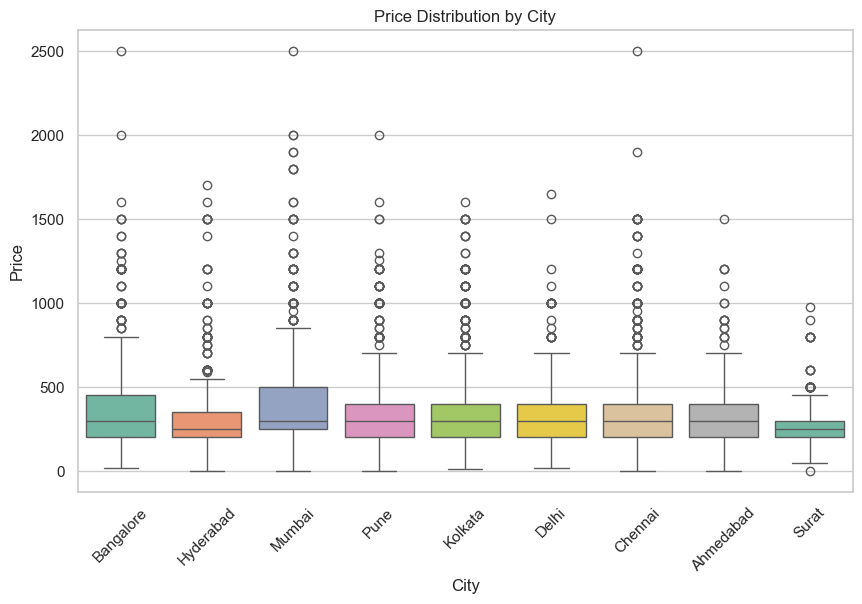

In [59]:
# price by city 
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Price', data=data, palette='Set2', hue='City', legend= False)
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


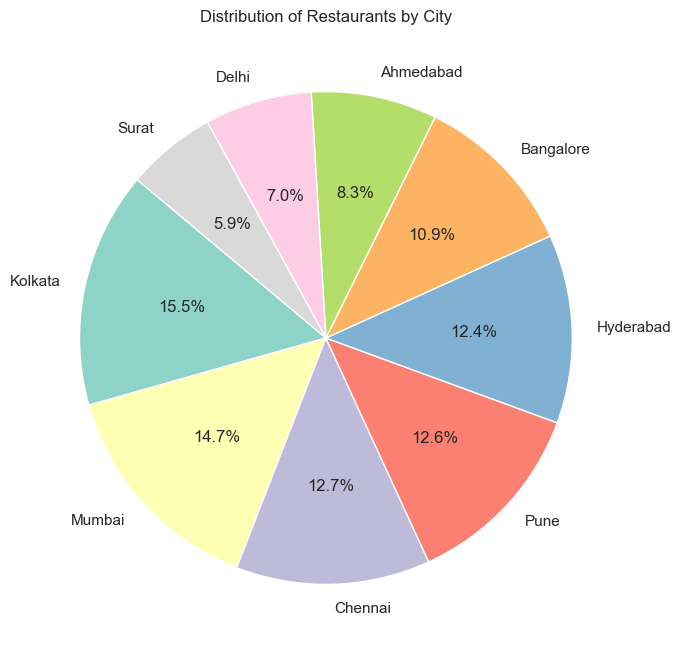

In [58]:
# distribution of restaurants by city
city_counts = data['City'].value_counts()
# pie chart
plt.figure(figsize=(10, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=140)
plt.title('Distribution of Restaurants by City')
plt.show()


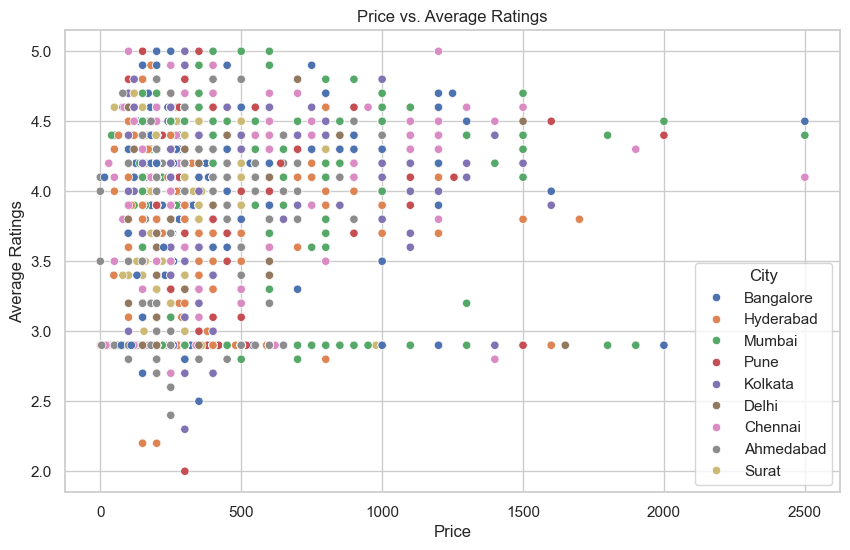

In [56]:
# Price vs. Avg Ratings
# scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Avg ratings', data=data, hue='City', palette='deep')
plt.title('Price vs. Average Ratings')
plt.xlabel('Price')
plt.ylabel('Average Ratings')
plt.legend(title='City')
plt.show()


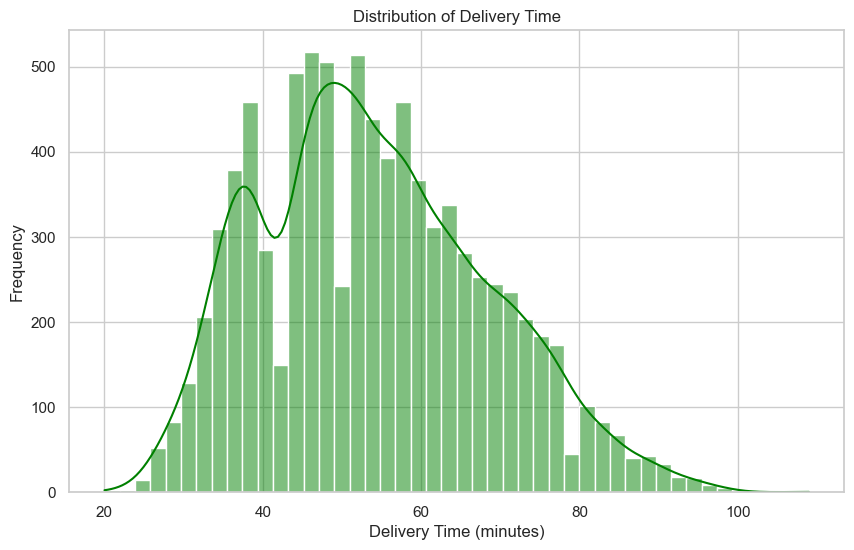

In [31]:
# delivery time distribution
# histogram plot
plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery time'], kde=True, color='green')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.show()

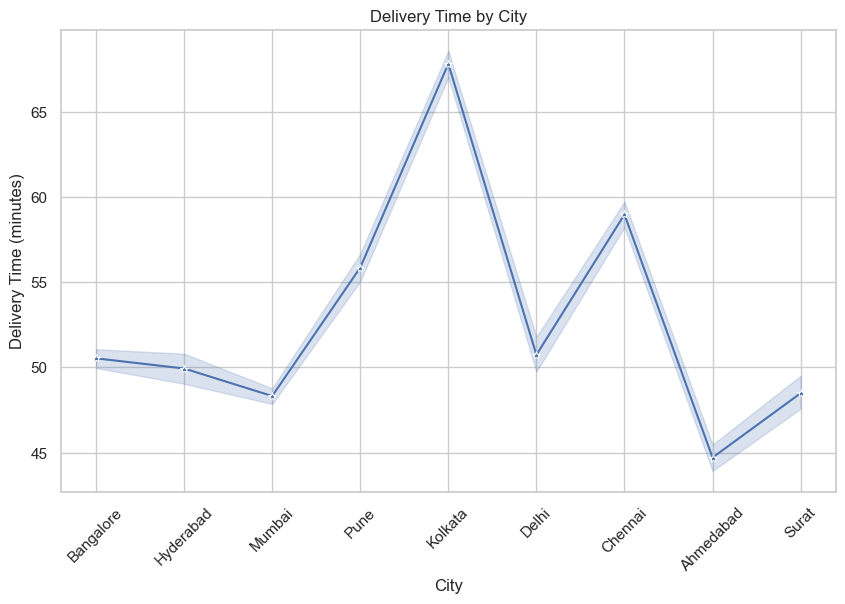

In [36]:
# box plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='City', y='Delivery time', data=data, marker='*')
plt.title('Delivery Time by City')
plt.xlabel('City')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

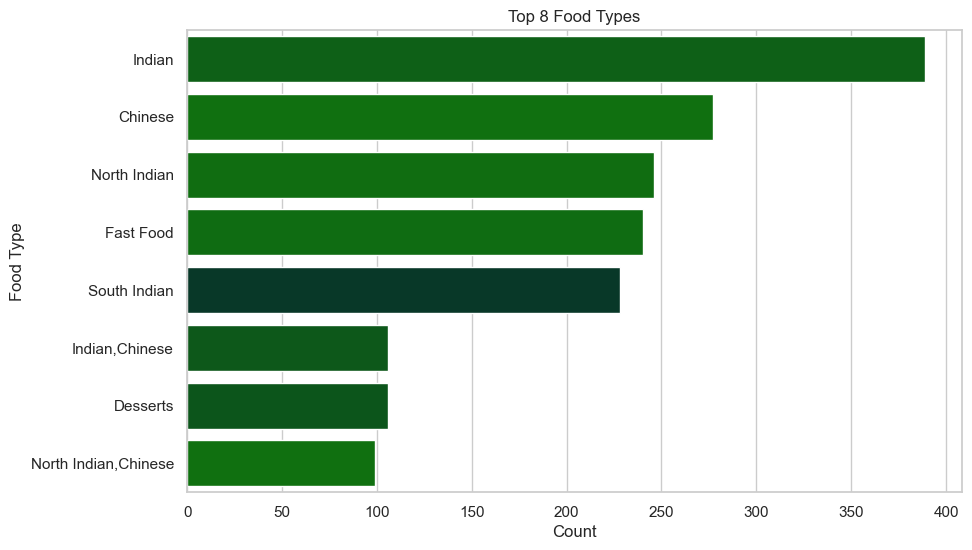

In [44]:
# Top 8 Food Types
plt.figure(figsize=(10, 6))
sns.countplot(y='Food type', data=data, hue='Food type', palette='ocean', order=data['Food type'].value_counts().index[:8])
plt.title('Top 8 Food Types')
plt.xlabel('Count')
plt.ylabel('Food Type')
plt.show()

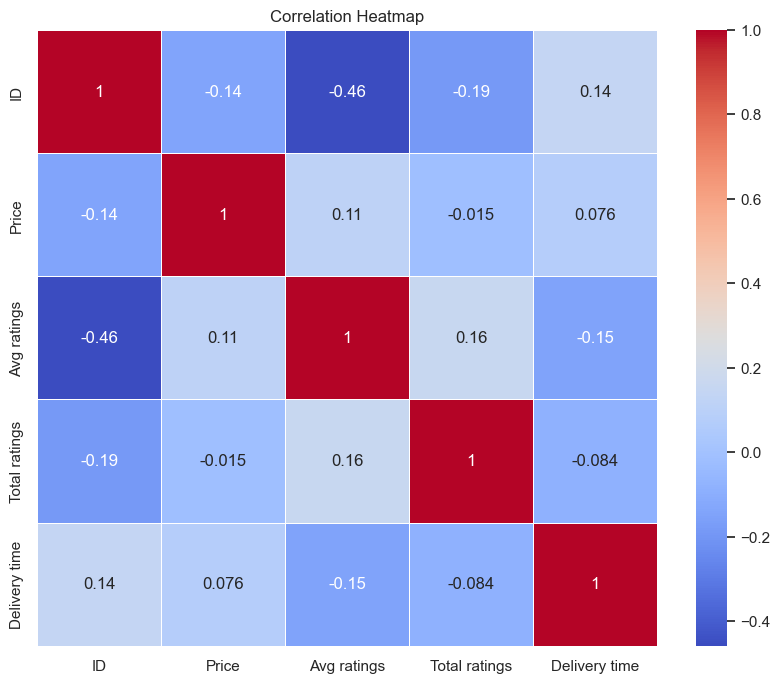

In [45]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
